In [41]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from analysis import run_crossvalidation, difference_of_means, permutation_test_against_baseline, permutation_test_between_targets

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(
    action='ignore', category=UserWarning, message=r"Boolean Series.*"
)


In [42]:
# Character-level surprisal estimator: an LM with beam size k
LM = 'gpt2_k5'

# Cross-validation parameters
N_SEEDS = 10
N_FOLDS = 10

# Required data paths
DATA_FOLDER = "../data/regression_data"
RESULTS_FOLDER = "../data/crossval_results"
FIGURES_FOLDER = "../data/figures"


# Predictors for all models considered

BASELINE_PREDICTORS = [
    'RegionLength', 'WordFreqZipf'
]

BASELINE_PREDICTORS_SPILLOVER = [
    'RegionLength', 'RegionLengthPrev', 'RegionLengthPrevPrev', 'WordFreqZipf', 'WordFreqZipfPrev', 'WordFreqZipfPrevPrev'
]

SURPRISAL_PREDICTORS = [
    ['SurprisalLeadingDynamic7'], ['SurprisalLeadingDynamic8'], ['SurprisalLeadingFixed'], ['SurprisalLeadingWhole'], ['SurprisalLeadingSpanning3'], ['SurprisalLeadingSpanning4'], ['SurprisalLeadingSpanning5'], ['SurprisalLeadingSpanning6'], ['SurprisalLeadingSpanning7'], ['SurprisalLeadingSpanningWhole'],
    ['SurprisalTrailingDynamic7'], ['SurprisalTrailingDynamic8'], ['SurprisalTrailingFixed'], ['SurprisalTrailingWhole'], ['SurprisalTrailingSpanning3'], ['SurprisalTrailingSpanning4'], ['SurprisalTrailingSpanning5'], ['SurprisalTrailingSpanning6'], ['SurprisalTrailingSpanning7'], ['SurprisalTrailingSpanningWhole'],
]

SURPRISAL_PREDICTORS_SPILLOVER = [
    ['SurprisalLeadingDynamic7', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingDynamic8', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingFixed', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingWhole', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingSpanning3', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingSpanning4', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingSpanning5', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingSpanning6', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingSpanning7', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalLeadingSpanningWhole', 'SurprisalLeadingPrev', 'SurprisalLeadingPrevPrev'],
    ['SurprisalTrailingDynamic7', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingDynamic8', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingFixed', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingWhole', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingSpanning3', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingSpanning4', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingSpanning5', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingSpanning6', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingSpanning7', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev'],
    ['SurprisalTrailingSpanningWhole', 'SurprisalTrailingPrev', 'SurprisalTrailingPrevPrev']
]

## UCL

In [43]:
# Load data
dataset_name = 'ucl'
data = pd.read_csv(f'{DATA_FOLDER}/{dataset_name}_{LM}.csv')
output_path = f"{RESULTS_FOLDER}/{LM}_{dataset_name}_{N_SEEDS}x{N_FOLDS}fold.csv"


UCL_PREDICTED_VARIABLES = ['FirstFixationDuration', 'FirstPassDuration', 'RightBoundedDuration']

if not os.path.exists(output_path):
    ucl_results_df = run_crossvalidation(data, LM, UCL_PREDICTED_VARIABLES, BASELINE_PREDICTORS, BASELINE_PREDICTORS_SPILLOVER, SURPRISAL_PREDICTORS, SURPRISAL_PREDICTORS_SPILLOVER, output_path=output_path, n_seeds=N_SEEDS, n_folds=N_FOLDS)
else:
    ucl_results_df = pd.read_csv(output_path)


In [31]:
ucl_pvals_against_baseline = permutation_test_against_baseline(ucl_results_df, UCL_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)
ucl_pvals_between_targets = permutation_test_between_targets(ucl_results_df, UCL_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)


## MECO

In [44]:
# Load data
dataset_name = 'mecoL1'
data = pd.read_csv(f'{DATA_FOLDER}/{dataset_name}_{LM}.csv')
output_path = f"{RESULTS_FOLDER}/{LM}_{dataset_name}_{N_SEEDS}x{N_FOLDS}fold.csv"

MECO_PREDICTED_VARIABLES = [
    'FirstFixationDuration', 'GazeDuration', 'TotalDuration'
]

if not os.path.exists(output_path):
    meco_results_df = run_crossvalidation(data, LM, MECO_PREDICTED_VARIABLES, BASELINE_PREDICTORS, BASELINE_PREDICTORS_SPILLOVER, SURPRISAL_PREDICTORS, SURPRISAL_PREDICTORS_SPILLOVER, output_path=output_path, n_seeds=N_SEEDS, n_folds=N_FOLDS)
else:
    meco_results_df = pd.read_csv(output_path)

In [33]:
meco_pvals_against_baseline = permutation_test_against_baseline(meco_results_df, MECO_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)
meco_pvals_between_targets = permutation_test_between_targets(meco_results_df, MECO_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)


## Provo

In [45]:
# Load data
dataset_name = 'provo'
data = pd.read_csv(f'{DATA_FOLDER}/{dataset_name}_{LM}.csv')
output_path = f"{RESULTS_FOLDER}/{LM}_{dataset_name}_{N_SEEDS}x{N_FOLDS}fold.csv"

PROVO_PREDICTED_VARIABLES = [
    'FirstFixationDuration', 'DwellTime', 'SkipRate'
]

if not os.path.exists(output_path):
    provo_results_df = run_crossvalidation(data, LM, PROVO_PREDICTED_VARIABLES, BASELINE_PREDICTORS, BASELINE_PREDICTORS_SPILLOVER, SURPRISAL_PREDICTORS, SURPRISAL_PREDICTORS_SPILLOVER, output_path=output_path, n_seeds=N_SEEDS, n_folds=N_FOLDS)
else:
    provo_results_df = pd.read_csv(output_path)



In [35]:
provo_pvals_against_baseline = permutation_test_against_baseline(provo_results_df, PROVO_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)
provo_pvals_between_targets = permutation_test_between_targets(provo_results_df, PROVO_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)


## CELER

In [46]:
# Load data
dataset_name = 'celer'
data = pd.read_csv(f'{DATA_FOLDER}/{dataset_name}_{LM}.csv')
output_path = f"{RESULTS_FOLDER}/{LM}_{dataset_name}_{N_SEEDS}x{N_FOLDS}fold.csv"

CELER_PREDICTED_VARIABLES = [
     'FirstFixationDuration', 'FirstPassDwellTime', 'DwellTime', 'SkipRate',
]

if not os.path.exists(output_path):
    celer_results_df = run_crossvalidation(data, LM, CELER_PREDICTED_VARIABLES, BASELINE_PREDICTORS, BASELINE_PREDICTORS_SPILLOVER, SURPRISAL_PREDICTORS, SURPRISAL_PREDICTORS_SPILLOVER, output_path=output_path, n_seeds=N_SEEDS, n_folds=N_FOLDS)
else:
    celer_results_df = pd.read_csv(output_path)

In [38]:
celer_pvals_against_baseline = permutation_test_against_baseline(celer_results_df, CELER_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)
celer_pvals_between_targets = permutation_test_between_targets(celer_results_df, CELER_PREDICTED_VARIABLES, SURPRISAL_PREDICTORS_SPILLOVER, difference_of_means, n_permutations=1000, random_state=0)


## Plotting

In [47]:
ucl_results_df['dataset'] = 'ucl'
meco_results_df['dataset'] = 'meco'
provo_results_df['dataset'] = 'provo'
celer_results_df['dataset'] = 'celer'

all_results_df = pd.concat([ucl_results_df, meco_results_df, provo_results_df, celer_results_df])


In [48]:
ucl_rename_dict = {
    'FirstFixationDuration': 'First Fixation Duration (UCL)',
    'FirstPassDuration': 'Gaze Duration (UCL)',
    'RightBoundedDuration': 'Total Duration (UCL)',
    'GoPastDuration': 'Go-Past Duration (UCL)'
}
meco_rename_dict = {
    'FirstFixationDuration': 'First Fixation Duration (MECO)',
    'GazeDuration': 'Gaze Duration (MECO)',
    'TotalDuration': 'Total Duration (MECO)',
}
provo_rename_dict = {
    'FirstFixationDuration': 'First Fixation Duration (Provo)',
    'DwellTime': 'Gaze Duration (Provo)',
    'SkipRate': 'Skip Rate (Provo)'
}
celer_rename_dict = {
    'FirstFixationDuration': 'First Fixation Duration (CELER)',
    'FirstPassDwellTime': 'Gaze Duration (CELER)',
    'DwellTime': 'Total Duration (CELER)',
    'SkipRate': 'Skip Rate (CELER)'
}

all_results_df['predicted'] = all_results_df.apply(lambda x: ucl_rename_dict[x['predicted']] if x['dataset'] == 'ucl' else x['predicted'], axis=1)
all_results_df['predicted'] = all_results_df.apply(lambda x: meco_rename_dict[x['predicted']] if x['dataset'] == 'meco' else x['predicted'], axis=1)
all_results_df['predicted'] = all_results_df.apply(lambda x: provo_rename_dict[x['predicted']] if x['dataset'] == 'provo' else x['predicted'], axis=1)
all_results_df['predicted'] = all_results_df.apply(lambda x: celer_rename_dict[x['predicted']] if x['dataset'] == 'celer' else x['predicted'], axis=1)

fa_rename_dict = {
    'Dynamic7': 'Dynamic (7)', 
    'Dynamic8': 'Dynamic (8)',
    'Fixed': 'Fixed',
    'Whole': 'Full ROI',
    'Spanning3': 'Look-ahead (3)',
    'Spanning4': 'Look-ahead (4)',
    'Spanning5': 'Look-ahead (5)',
    'Spanning6': 'Look-ahead (6)',
    'Spanning7': 'Look-ahead (7)',
    'SpanningWhole': 'Look-ahead (Full)'
}
all_results_df['fa_type'] = all_results_df.apply(lambda x: fa_rename_dict[x['fa_type']], axis=1)


palette = sns.color_palette("cubehelix", 40)
selected_palette = [palette[9], palette[14], palette[18], palette[20], palette[25], palette[27], palette[29], palette[31], palette[33], palette[35]]

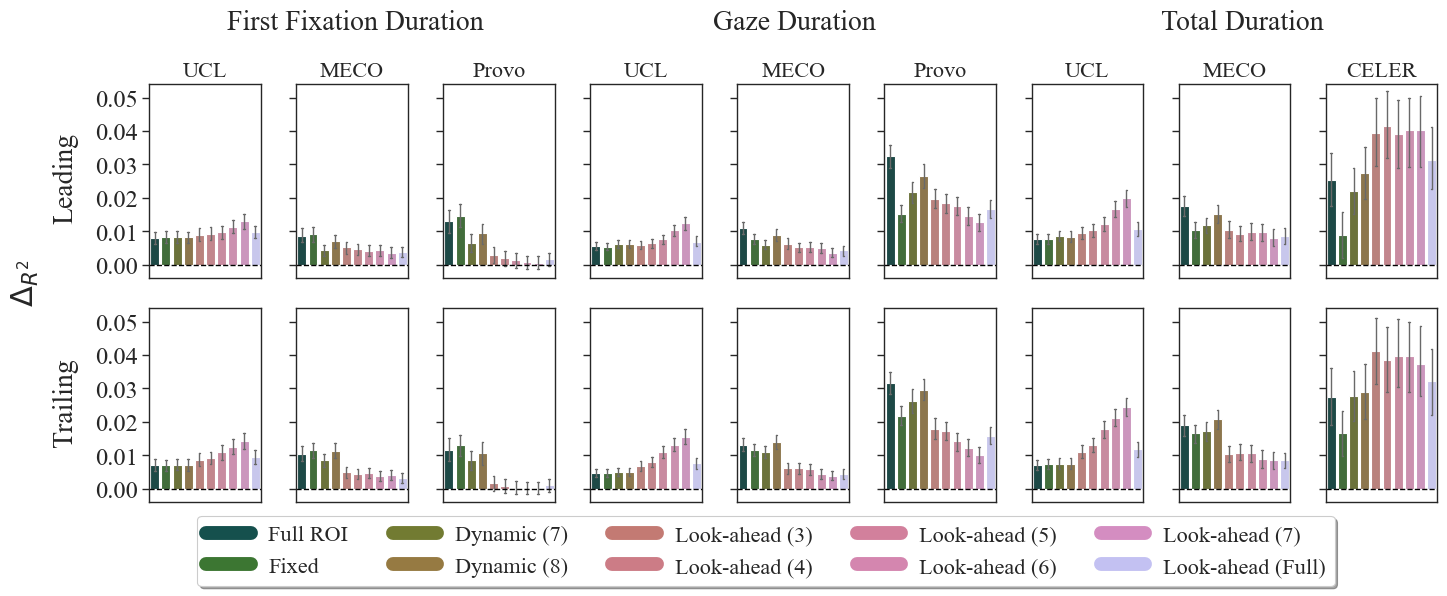

In [49]:
ordered_rts = [
    'First Fixation Duration (UCL)', 'First Fixation Duration (MECO)', 'First Fixation Duration (Provo)', 
    'Gaze Duration (UCL)', 'Gaze Duration (MECO)', 'Gaze Duration (Provo)',  
    'Total Duration (UCL)', 'Total Duration (MECO)', 'Total Duration (CELER)',
]

# Plot style settings
sns.set_theme(style="ticks", context="paper", font_scale=2)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
palette = sns.color_palette("cubehelix", 40)
selected_palette = [palette[9], palette[14], palette[17], palette[19]] +  palette[22:27] + [palette[31]]

fig, ax = plt.subplots(2, 9, figsize=(14, 5), sharey=True, sharex=True)

for i, predicted_var in enumerate(ordered_rts):
    for j, roi_type in enumerate(['Leading', 'Trailing']):
    
        df_ = all_results_df[
            (all_results_df['predicted'] == predicted_var) & 
            (all_results_df['spillover'] == True) &
            (all_results_df['roi_type'] == roi_type)
        ]
    
        df_['fa_type'] = pd.Categorical(df_['fa_type'], categories=['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)', 'Look-ahead (3)', 'Look-ahead (4)', 'Look-ahead (5)', 'Look-ahead (6)', 'Look-ahead (7)', 'Look-ahead (Full)'], ordered=True)
        df_ = df_.sort_values('fa_type')
    
        sns.barplot(
            data=df_, x='fa_type', y='delta_rsquared_test', hue='fa_type',
            ax=ax[j, i], legend=False, errorbar=("ci", 95), palette=selected_palette,
            err_kws={'linewidth': 1, 'color': 'dimgray'}, capsize=0.15,
        )

        if j == 0:
            plot_title = predicted_var.split('(')[-1][:-1]
            ax[j, i].set_title(plot_title, fontsize=16)

        ax[j, i].set_xlabel('')
        ax[j, i].set_ylabel('')
        ax[j, i].yaxis.set_major_locator(plt.MultipleLocator(0.01))
        ax[j, i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax[j, i].set_ylim(-0.004, 0.054)
        ax[j, i].axhline(0, color='black', linestyle='--', linewidth=1)

fig.text(0.115, 1.02, 'First Fixation Duration', va='center', rotation='horizontal', fontsize=20)
fig.text(0.462, 1.02, 'Gaze Duration', va='center', rotation='horizontal', fontsize=20)
fig.text(0.782, 1.02, 'Total Duration', va='center', rotation='horizontal', fontsize=20)
fig.text(-0.04, 0.5, r'$\Delta_{R^2}$', va='center', rotation='vertical', fontsize=22)
fig.text(-0.01, 0.71, 'Leading', va='center', rotation='vertical', fontsize=20)
fig.text(-0.01, 0.26, 'Trailing', va='center', rotation='vertical', fontsize=20)

custom_lines = [Line2D([0], [0], color=selected_palette[i], lw=10) for i in range(10)]
fig.legend(custom_lines, ['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)', 'Look-ahead (3)', 'Look-ahead (4)', 'Look-ahead (5)', 'Look-ahead (6)', 'Look-ahead (7)', 'Look-ahead (Full)'],
           loc='lower center', ncol=5, title='', bbox_to_anchor=(0.5, -0.13), fontsize=16, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig(f"{FIGURES_FOLDER}/all_datasets_rsquared_by_focal_area.pdf", bbox_inches='tight')
plt.show()


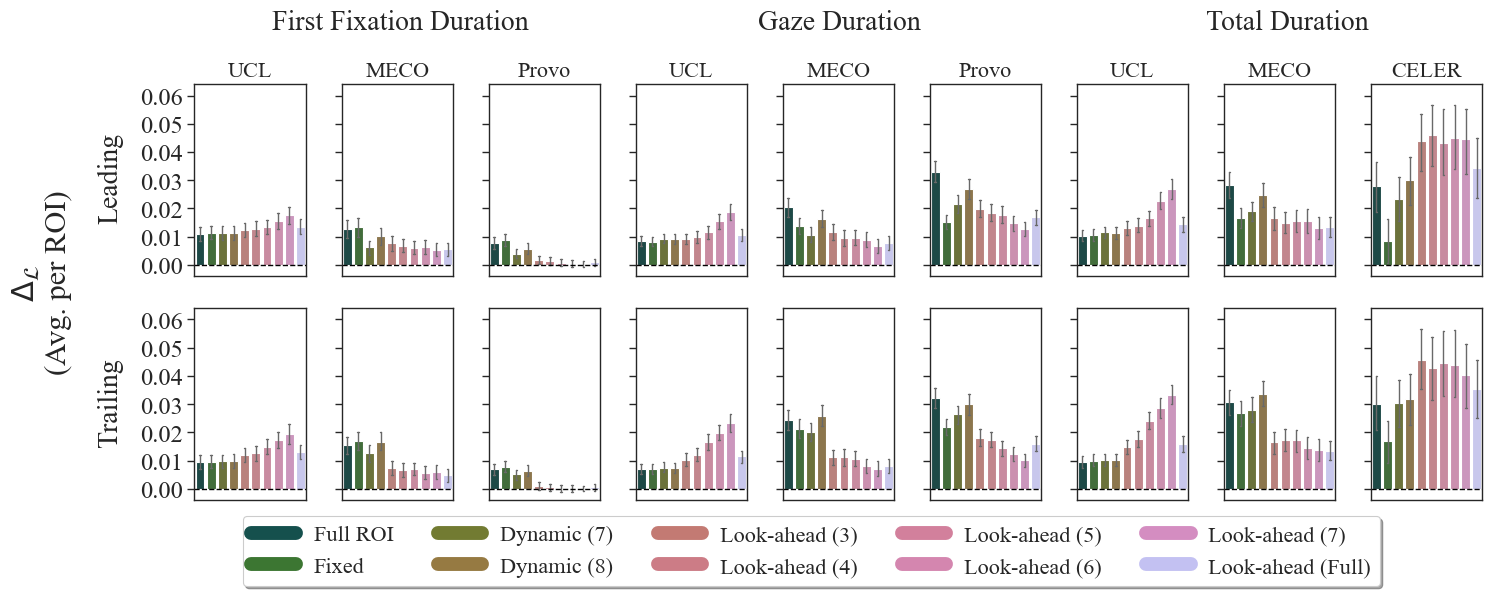

In [50]:
ordered_rts = [
    'First Fixation Duration (UCL)', 'First Fixation Duration (MECO)', 'First Fixation Duration (Provo)', 
    'Gaze Duration (UCL)', 'Gaze Duration (MECO)', 'Gaze Duration (Provo)',  
    'Total Duration (UCL)', 'Total Duration (MECO)', 'Total Duration (CELER)',
]

# Plot style settings
sns.set_theme(style="ticks", context="paper", font_scale=2)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
palette = sns.color_palette("cubehelix", 40)
selected_palette = [palette[9], palette[14], palette[17], palette[19]] +  palette[22:27] + [palette[31]]

fig, ax = plt.subplots(2, 9, figsize=(14, 5), sharey=True, sharex=True)

for i, predicted_var in enumerate(ordered_rts):
    for j, roi_type in enumerate(['Leading', 'Trailing']):
    
        df_ = all_results_df[
            (all_results_df['predicted'] == predicted_var) & 
            (all_results_df['spillover'] == True) &
            (all_results_df['roi_type'] == roi_type)
        ]
    
        df_['fa_type'] = pd.Categorical(df_['fa_type'], categories=['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)', 'Look-ahead (3)', 'Look-ahead (4)', 'Look-ahead (5)', 'Look-ahead (6)', 'Look-ahead (7)', 'Look-ahead (Full)'], ordered=True)
        df_ = df_.sort_values('fa_type')
    
        sns.barplot(
            data=df_, x='fa_type', y='delta_loglik_test', hue='fa_type',
            ax=ax[j, i], legend=False, errorbar=("ci", 95), palette=selected_palette,
            err_kws={'linewidth': 1, 'color': 'dimgray'}, capsize=0.15,
        )

        if j == 0:
            plot_title = predicted_var.split('(')[-1][:-1]
            ax[j, i].set_title(plot_title, fontsize=16)

        ax[j, i].set_xlabel('')
        ax[j, i].set_ylabel('')
        ax[j, i].yaxis.set_major_locator(plt.MultipleLocator(0.01))
        ax[j, i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax[j, i].set_ylim(-0.004, 0.064)
        ax[j, i].axhline(0, color='black', linestyle='--', linewidth=1)


fig.text(0.115, 1.02, 'First Fixation Duration', va='center', rotation='horizontal', fontsize=20)
fig.text(0.462, 1.02, 'Gaze Duration', va='center', rotation='horizontal', fontsize=20)
fig.text(0.782, 1.02, 'Total Duration', va='center', rotation='horizontal', fontsize=20)
fig.text(-0.05, 0.5, r'$\Delta_{\mathcal{L}}$' + '\n(Avg. per ROI)', va='center', ha='center', rotation='vertical', fontsize=22)
fig.text(-0.01, 0.71, 'Leading', va='center', rotation='vertical', fontsize=20)
fig.text(-0.01, 0.26, 'Trailing', va='center', rotation='vertical', fontsize=20)

custom_lines = [Line2D([0], [0], color=selected_palette[i], lw=10) for i in range(10)]
fig.legend(custom_lines, ['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)', 'Look-ahead (3)', 'Look-ahead (4)', 'Look-ahead (5)', 'Look-ahead (6)', 'Look-ahead (7)', 'Look-ahead (Full)'],
           loc='lower center', ncol=5, title='', bbox_to_anchor=(0.5, -0.13), fontsize=16, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig(f"{FIGURES_FOLDER}/all_datasets_loglik_by_focal_area.pdf", bbox_inches='tight')
plt.show()


/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/1946716782.py:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/1946716782.py:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


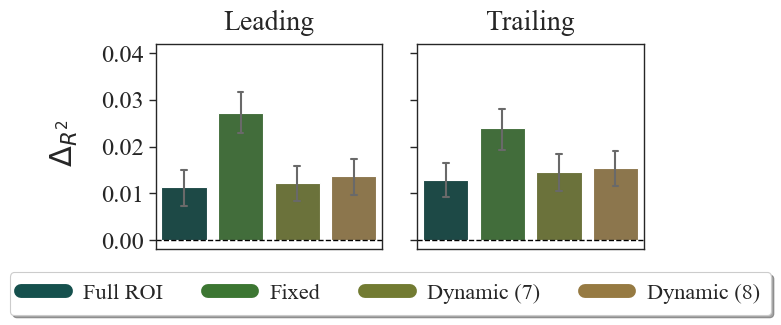

In [51]:
# Plot style settings
sns.set_theme(style="ticks", context="paper", font_scale=2)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
palette = sns.color_palette("cubehelix", 10)[2:]

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

predicted_var = 'Skip Rate (CELER)'
df_ = all_results_df[
    (all_results_df['predicted'] == predicted_var) & 
    (all_results_df['spillover'] == True)
]

df_ = df_[~df_['fa_type'].str.contains('Spanning')]

df_['fa_type'] = pd.Categorical(df_['fa_type'], categories=['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], ordered=True)
df_ = df_.sort_values('fa_type')

df_1 = df_[df_['roi_type'] == 'Leading']
sns.barplot(
    data=df_1, x='fa_type', y='delta_rsquared_test', hue='fa_type',
    ax=ax[0], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[0].set_title(f"Leading", fontsize=20, pad=10)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax[0].set_ylim(-0.002, 0.042)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)

df_2 = df_[df_['roi_type'] == 'Trailing']
sns.barplot(
    data=df_2, x='fa_type', y='delta_rsquared_test', hue='fa_type',
    ax=ax[1], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[1].set_title(f"Trailing", fontsize=20, pad=10)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax[1].set_ylim(-0.002, 0.042)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)

ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

fig.text(-0.04, 0.46, r'$\Delta_{R^2}$', va='center', rotation='vertical', fontsize=22)

custom_lines = [Line2D([0], [0], color=selected_palette[i], lw=10) for i in range(4)]
fig.legend(custom_lines, ['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], loc='lower center', ncol=4, title='', bbox_to_anchor=(0.53, -0.15), fontsize=16, frameon=True, fancybox=True, shadow=True, borderpad=0.5)

plt.tight_layout()
plt.savefig(f"{FIGURES_FOLDER}/skip_rate_celer_rsquared.pdf", bbox_inches='tight')
plt.show()


/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/1421122680.py:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/1421122680.py:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


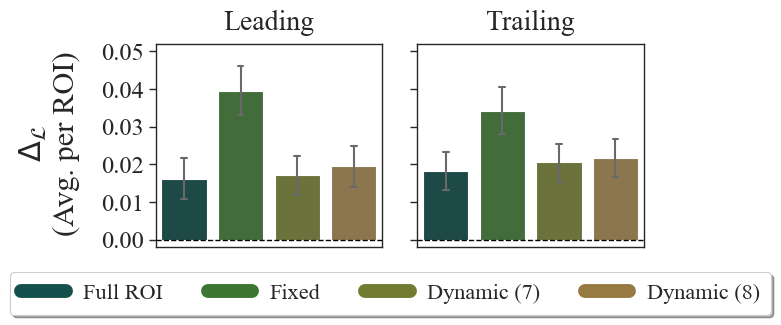

In [52]:
# Plot style settings
sns.set_theme(style="ticks", context="paper", font_scale=2)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
palette = sns.color_palette("cubehelix", 10)[2:]

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

predicted_var = 'Skip Rate (CELER)'
df_ = all_results_df[
    (all_results_df['predicted'] == predicted_var) & 
    (all_results_df['spillover'] == True)
]

df_ = df_[~df_['fa_type'].str.contains('Spanning')]

df_['fa_type'] = pd.Categorical(df_['fa_type'], categories=['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], ordered=True)
df_ = df_.sort_values('fa_type')

df_1 = df_[df_['roi_type'] == 'Leading']
sns.barplot(
    data=df_1, x='fa_type', y='delta_loglik_test', hue='fa_type',
    ax=ax[0], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[0].set_title(f"Leading", fontsize=20, pad=10)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax[0].set_ylim(-0.002, 0.052)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)

df_2 = df_[df_['roi_type'] == 'Trailing']
sns.barplot(
    data=df_2, x='fa_type', y='delta_loglik_test', hue='fa_type',
    ax=ax[1], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[1].set_title(f"Trailing", fontsize=20, pad=10)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax[1].set_ylim(-0.002, 0.052)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)

ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

fig.text(-0.04, 0.46, r'$\Delta_{\mathcal{L}}$' + '\n(Avg. per ROI)', va='center', ha='center', rotation='vertical', fontsize=22)

custom_lines = [Line2D([0], [0], color=selected_palette[i], lw=10) for i in range(4)]
fig.legend(custom_lines, ['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], loc='lower center', ncol=4, title='', bbox_to_anchor=(0.53, -0.15), fontsize=16, frameon=True, fancybox=True, shadow=True, borderpad=0.5)

plt.tight_layout()
plt.savefig(f"{FIGURES_FOLDER}/skip_rate_celer_loglik.pdf", bbox_inches='tight')
plt.show()


/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/529855302.py:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/529855302.py:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


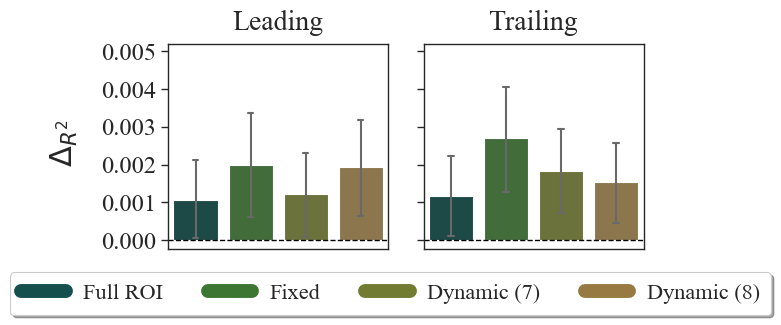

In [53]:
# Plot style settings
sns.set_theme(style="ticks", context="paper", font_scale=2)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
palette = sns.color_palette("cubehelix", 10)[2:]

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

predicted_var = 'Skip Rate (Provo)'
df_ = all_results_df[
    (all_results_df['predicted'] == predicted_var) & 
    (all_results_df['spillover'] == True)
]

df_ = df_[~df_['fa_type'].str.contains('Spanning')]

df_['fa_type'] = pd.Categorical(df_['fa_type'], categories=['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], ordered=True)
df_ = df_.sort_values('fa_type')

df_1 = df_[df_['roi_type'] == 'Leading']
sns.barplot(
    data=df_1, x='fa_type', y='delta_rsquared_test', hue='fa_type',
    ax=ax[0], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[0].set_title(f"Leading", fontsize=20, pad=10)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.001))

ax[0].set_ylim(-0.002, 0.052)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)

df_2 = df_[df_['roi_type'] == 'Trailing']
sns.barplot(
    data=df_2, x='fa_type', y='delta_rsquared_test', hue='fa_type',
    ax=ax[1], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[1].set_title(f"Trailing", fontsize=20, pad=10)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].yaxis.set_major_locator(plt.MultipleLocator(0.001))

ax[1].set_ylim(-0.00025, 0.0052)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)

ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

fig.text(-0.04, 0.46, r'$\Delta_{R^2}$', va='center', rotation='vertical', fontsize=22)

custom_lines = [Line2D([0], [0], color=selected_palette[i], lw=10) for i in range(4)]
fig.legend(custom_lines, ['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], loc='lower center', ncol=4, title='', bbox_to_anchor=(0.53, -0.15), fontsize=16, frameon=True, fancybox=True, shadow=True, borderpad=0.5)

plt.tight_layout()
plt.savefig(f"{FIGURES_FOLDER}/skip_rate_provo_rsquared.pdf", bbox_inches='tight')
plt.show()


/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/385519480.py:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
/var/folders/br/3tw2dd_x2xd230m_jy9q2zxc0000gn/T/ipykernel_19787/385519480.py:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


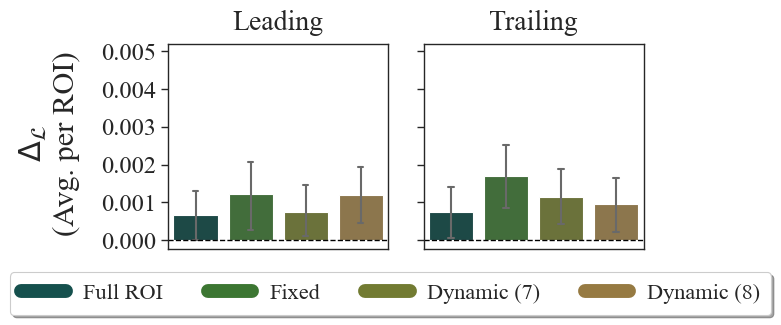

In [54]:
# Plot style settings
sns.set_theme(style="ticks", context="paper", font_scale=2)
sns.set_style("ticks", {'font.family': 'Times New Roman'})
palette = sns.color_palette("cubehelix", 10)[2:]

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

predicted_var = 'Skip Rate (Provo)'
df_ = all_results_df[
    (all_results_df['predicted'] == predicted_var) & 
    (all_results_df['spillover'] == True)
]

df_ = df_[~df_['fa_type'].str.contains('Spanning')]

df_['fa_type'] = pd.Categorical(df_['fa_type'], categories=['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], ordered=True)
df_ = df_.sort_values('fa_type')

df_1 = df_[df_['roi_type'] == 'Leading']
sns.barplot(
    data=df_1, x='fa_type', y='delta_loglik_test', hue='fa_type',
    ax=ax[0], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[0].set_title(f"Leading", fontsize=20, pad=10)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.001))

ax[0].set_ylim(-0.002, 0.052)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)

df_2 = df_[df_['roi_type'] == 'Trailing']
sns.barplot(
    data=df_2, x='fa_type', y='delta_loglik_test', hue='fa_type',
    ax=ax[1], legend=False, errorbar=("ci", 95), palette=selected_palette,
    err_kws={'linewidth': 1.5, 'color': 'dimgray'}, capsize=0.1
)

ax[1].set_title(f"Trailing", fontsize=20, pad=10)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].yaxis.set_major_locator(plt.MultipleLocator(0.001))

ax[1].set_ylim(-0.00025, 0.0052)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)

ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

fig.text(-0.04, 0.46, r'$\Delta_{\mathcal{L}}$' + '\n(Avg. per ROI)', va='center', ha='center', rotation='vertical', fontsize=22)

custom_lines = [Line2D([0], [0], color=selected_palette[i], lw=10) for i in range(4)]
fig.legend(custom_lines, ['Full ROI', 'Fixed', 'Dynamic (7)', 'Dynamic (8)'], loc='lower center', ncol=4, title='', bbox_to_anchor=(0.53, -0.15), fontsize=16, frameon=True, fancybox=True, shadow=True, borderpad=0.5)

plt.tight_layout()
plt.savefig(f"{FIGURES_FOLDER}/skip_rate_provo_loglik.pdf", bbox_inches='tight')
plt.show()
